In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use("customstyle")
import sys
sys.path.append("../modules")
import PBD_analog
import matplotlib as mpl

with open("C:/Users/pveron/colors/palette1.txt", "r") as f:
    colors = f.read().splitlines()
with open("C:/Users/pveron/colors/ratp.txt", "r") as f:
    palette = f.read().splitlines()

labels = dict(l1 = "\\lambda_1", l2 = "\\lambda_2", l3 = "\\lambda_3",
              m1 = "\\mu_1", m2 = "\\mu_2")
long_labels = dict(l1 = "Initiation rate from good", l2 = "Completion rate", l3 = "Initiation rate from incipient",
              m1 = "Extinction rate of good", m2 = "Extinction rate of incipient")

In [2]:
np.arange(0.1,2.0,0.4)

array([0.1, 0.5, 0.9, 1.3, 1.7])

In [3]:
par_default = {'l1': 0.3, 'l2': 0.4, 'l3': 0.3, 'm1': 0.1, 'm2': 0.1}
solver_kwargs = dict(atol = 1e-15, rtol = 1e-15)


var1 = 'l2'
var2 = 'l1'

val1 = [0.1, 0.3, 0.5, 0.7, 0.9]
val2 = [0.1,0.6,1.1,1.6]

T = np.linspace(0,15,1000)

Rates = np.zeros((len(val1), len(val2), len(T), 2)) # varBD rates
CBD_rates = np.zeros((len(val1), len(val2), 2)) # constant BD rates

for i1, x1 in enumerate(val1):
    for i2, x2 in enumerate(val2):
        par = par_default.copy()
        par[var1] = x1
        par[var2] = x2

        l,m = PBD_analog.fixedZero_PBD_to_varBD(T, **par, solver_kwargs=solver_kwargs, 
                                                smooth_convergence=True, 
                                                conv_crit = dict(tol = 1e-5, w = 10, silent = False))
        Rates[i1, i2, :, 0] = l
        Rates[i1, i2, :, 1] = m

        cl, cm = PBD_analog.analog_BD_rates(**par, branch_at_initiation=True)
        CBD_rates[i1, i2, 0] = cl
        CBD_rates[i1, i2, 1] = cm

c:\Users\pveron\anaconda3\lib\site-packages\scipy\integrate\_ivp\common.py:47: UserWarning: At least one element of `rtol` is too small. Setting `rtol = np.maximum(rtol, 2.220446049250313e-14)`.
  warn("At least one element of `rtol` is too small. "
c:\Users\pveron\Documents\GitHub\PBD_analog\1-rates_analysis\../modules\PBD_analog.py:140: RuntimeWarning: invalid value encountered in sqrt
  pIE =  1/b * np.sqrt(num/den - 0.5*(l*(k-l) + 2*a*b))


Convergence test failed
Convergence test failed
Convergence test failed
Convergence test failed
Convergence test failed
Convergence test failed
Convergence test failed
Convergence test failed
Convergence test failed
Convergence test failed
Convergence test failed
Convergence test failed
Convergence test failed
Convergence test failed
Convergence test failed
Convergence test failed


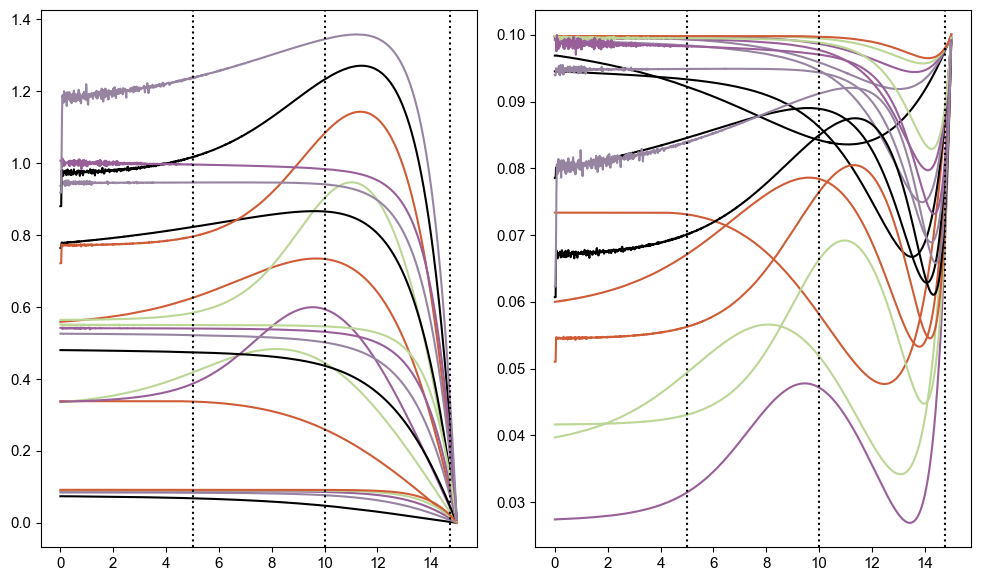

In [4]:
Tsteps = [T[-1] - t for t in [0.25, 5, 10]]

fig, axes = plt.subplots(1, 2, figsize = (10,6))

for i1 in range(len(val1)):
    for i2 in range(len(val2)):
        axes[0].plot(T, Rates[i1, i2, :, 0])
        axes[1].plot(T, Rates[i1, i2, :, 1])

for i in range(2):
    for t in Tsteps:
        axes[i].axvline(t, ls = ":")

In [5]:
Rates_steps = np.zeros((len(val1), len(val2), len(Tsteps), 2))

for i1 in range(len(val1)):
    for i2 in range(len(val2)):
        for iR in (0,1):
            Rates_steps[i1, i2, :, iR] = np.interp(Tsteps, T, Rates[i1, i2, :, iR])        

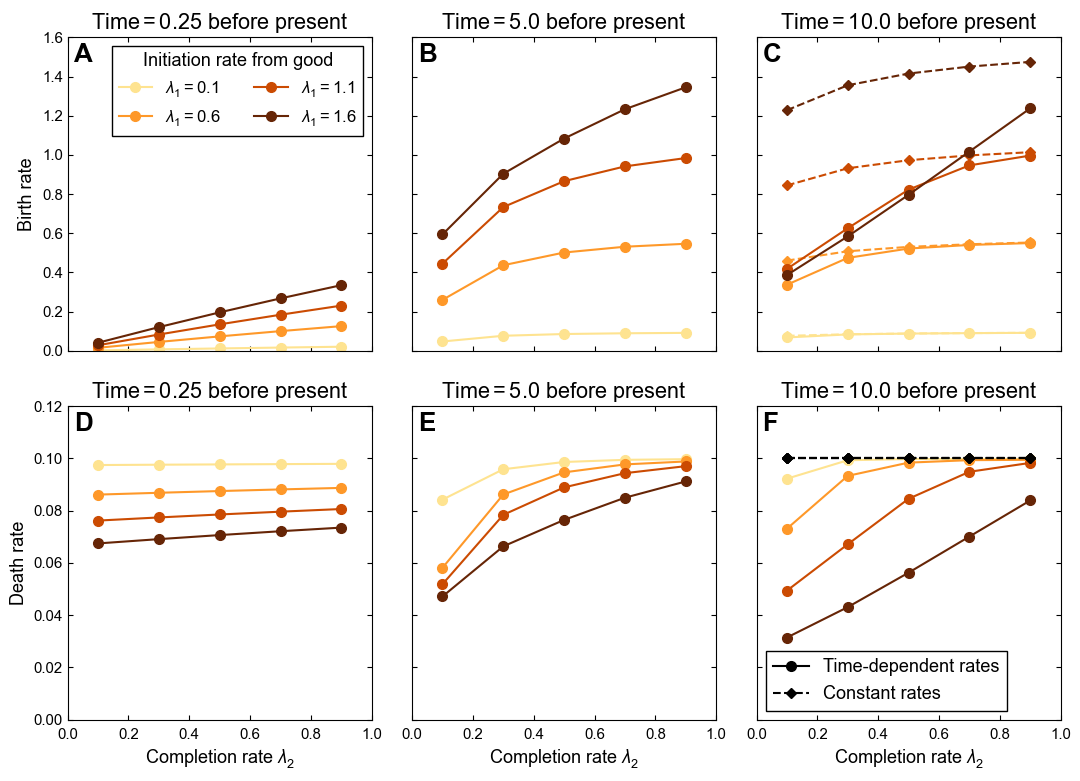

In [17]:
fig, axes = plt.subplots(2, len(Tsteps), figsize = (11,8), sharex = True, sharey = "row")

cmap = mpl.colormaps["YlOrBr"]

panels = (('A', 'B', 'C'), ('D', 'E', 'F'))

iR = 1 # 0 for birth rate, 1 for death rate 

stl_cbd = dict(ls = "--", marker = "D", markersize = 5)
stl_varbd = dict(ls = "-", marker = "o", markersize = 7)

for iR in (0,1):
    for it, t in enumerate(Tsteps):
        ax  = axes[iR, it]
        for i2, x2 in enumerate(val2):
            color = cmap((1+i2) / len(val2))
            stl = dict(color = cmap((1+i2) / len(val2)), **stl_varbd)
            if iR == 0 and it == 0:
                stl['label'] = "${}={}$".format(labels[var2], x2)
            ax.plot(val1, Rates_steps[:, i2, it, iR], **stl)
            ax.set_title("Time$={}$ before present".format(T[-1] - t))

            # plot constant rates
            if iR == 0: 
                color = color = cmap((1+i2) / len(val2))
            else: # death rate does not depend on l1 in CBD
                color = 'k'

            if it == len(Tsteps) -1:
                ax.plot(val1, CBD_rates[:, i2, iR], color = color, **stl_cbd)

        if iR == 1:
            ax.set_xlabel("{} ${}$".format(long_labels[var1], labels[var1]))


        ax.tick_params(axis = "both", direction = "in")
        ax.yaxis.set_ticks_position('both')
        ax.xaxis.set_ticks_position('both')
        ax.text(x = 0.02, y = 0.92, s = panels[iR][it], weight = "bold", 
                size = "x-large", transform = ax.transAxes)

# Legend CBD vs varBD        
axes[-1,-1].plot([],[], color = "k", label = "Time-dependent rates", **stl_varbd)    
axes[-1,-1].plot([],[],  color = "k", label = "Constant rates", **stl_cbd)    
axes[-1,-1].legend()


axes[0,0].legend(title = long_labels[var2], prop={'size': 12}, ncol = 2)

axes[0,0].set_xlim(0,1)
axes[0,0].set_ylim(0, 1.6)
axes[1,0].set_ylim(0,0.12)

for ax in axes[1,:]:    
    ax.tick_params(axis='x', which='major', pad=6)

axes[0,0].set_ylabel("Birth rate")
axes[1,0].set_ylabel("Death rate")
plt.savefig("../fig/BD_rates_with_l1l2.pdf");

C:\Users\pveron\AppData\Local\Temp\ipykernel_3260\1835759061.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['0'] + [str(np.round(x,4)) for x in ax.get_xticks()[1:]])
C:\Users\pveron\AppData\Local\Temp\ipykernel_3260\1835759061.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0'] + [str(np.round(y,4)) for y in ax.get_yticks()[1:]])


Text(0, 0.5, 'Net diversification rate')

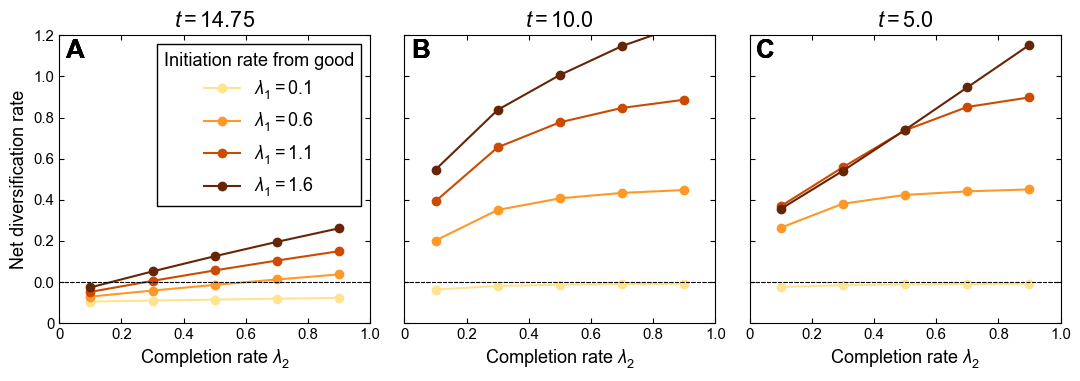

In [7]:
fig, axes = plt.subplots(1, len(Tsteps), figsize = (11,4), sharex = True, sharey = True)

cmap = mpl.colormaps["YlOrBr"]

panels = (('A', 'B', 'C'))


for it, t in enumerate(Tsteps):
    for i2, x2 in enumerate(val2):
        divrate = Rates_steps[:, i2, it, 0] - Rates_steps[:, i2, it, 1]
        axes[it].plot(val1, divrate,  ls = "-", marker = "o", 
                          label = "${}={}$".format(labels[var2], x2),
                          color = cmap((1+i2) / len(val2)))
    axes[it].set_title("$t = {}$".format(t))
    axes[it].set_xlabel("{} ${}$".format(long_labels[var1], labels[var1]))
    

    for it in range(len(Tsteps)):
        ax = axes[it]
        ax.axhline(0, ls = "--", color = "k", lw = 0.75)
        ax.tick_params(axis = "both", direction = "in")
        ax.yaxis.set_ticks_position('both')
        
        ax.xaxis.set_ticks_position('both')
        ax.text(x = 0.02, y = 0.92, s = panels[it], weight = "bold", 
                size = "x-large", transform = ax.transAxes)
        
        

axes[0].legend(title = long_labels[var2])

ax.set_xlim(0,1)
ax.set_ylim(-0.2,1.2)
ax.set_xticklabels(['0'] + [str(np.round(x,4)) for x in ax.get_xticks()[1:]])
ax.set_yticklabels(['0'] + [str(np.round(y,4)) for y in ax.get_yticks()[1:]])
axes[0].set_ylabel("Net diversification rate")